<a href="https://colab.research.google.com/github/megha-66/Deep-Learning-Lab-works-/blob/main/Lab2_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Loss: 0.8701903223991394


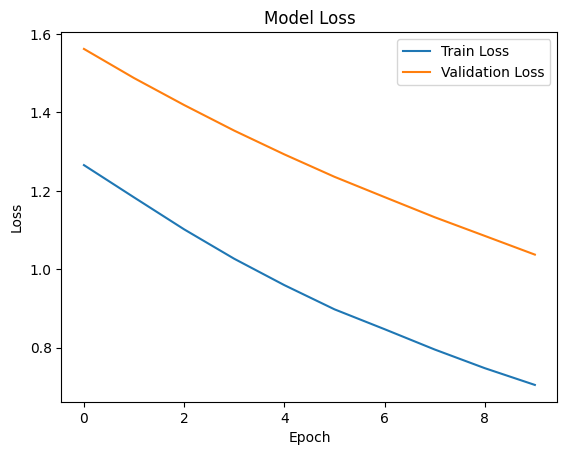

In [ ]:
# @title Implementation 1
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adam

import matplotlib.pyplot as plt

# Loading the dataset
dataset = pd.read_csv(r'/content/synthetic_regression_dataset (1).csv')

# Splitting the dataset into input features and target variable
X = dataset.drop(columns='target')
y = dataset['target']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Defining the neural network architecture
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # Input layer and first hidden layer
model.add(Dense(32, activation='relu'))  # Second hidden layer
model.add(Dense(1, activation='linear'))  # Output layer for regression

model.compile(optimizer='adam', loss='mean_squared_error')

# Training the model and store the training history
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=0)

# Evaluating the model on the test set
loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {loss}')




plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# Showing the plot
plt.show()

Training model with dropout rate: 0.1


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training model with dropout rate: 0.2
Training model with dropout rate: 0.3


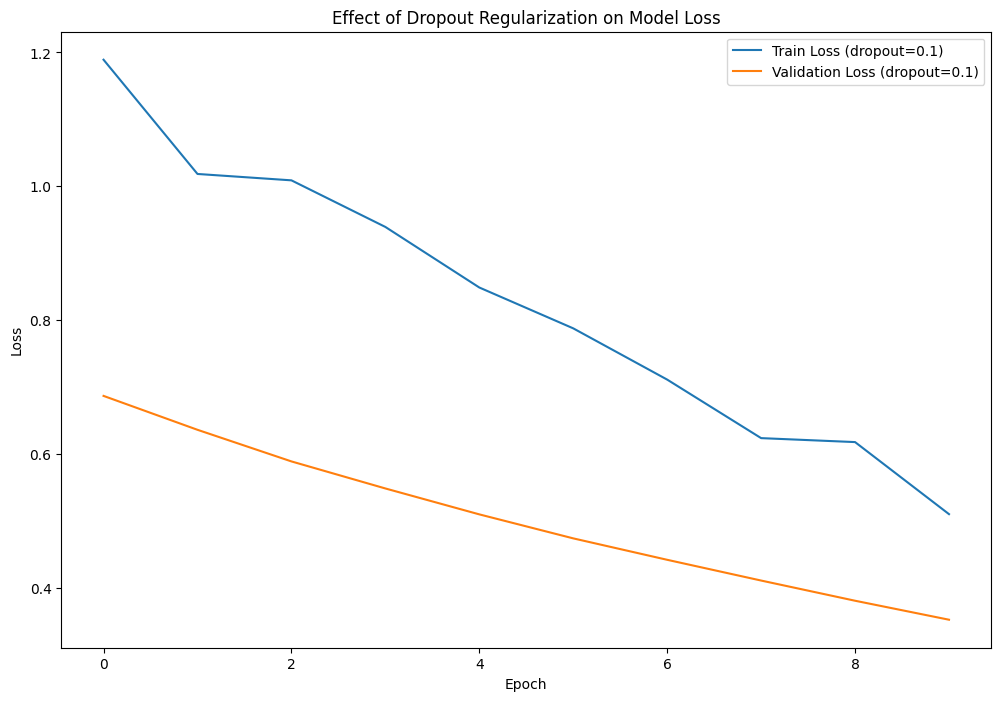

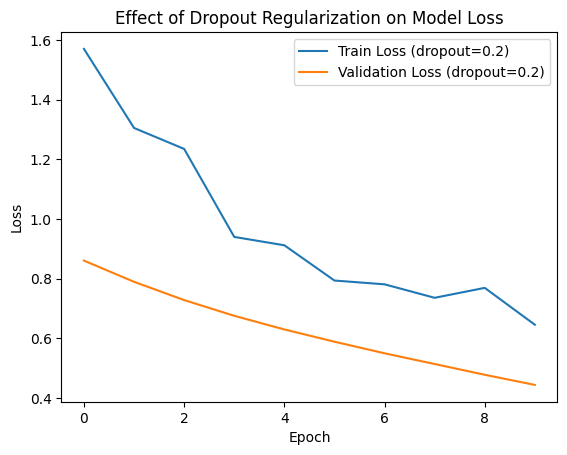

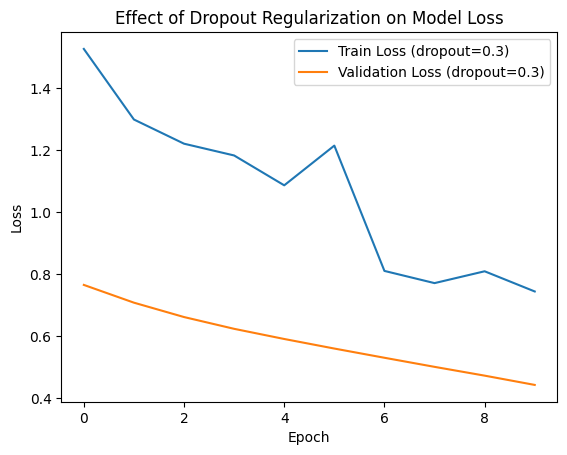

In [ ]:
# @title Implementation 2
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Loading the dataset
dataset = pd.read_csv(r'/content/synthetic_regression_dataset (1).csv')

# Assuming your target variable is in the last column
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Function to create the model with dropout
def create_model(dropout_rate):
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='linear'))

    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    return model

# List of dropout rates to experiment with
dropout_rates = [0.1, 0.2, 0.3]

 # Dictionary to store histories
histories = {}

for rate in dropout_rates:
    print(f"Training model with dropout rate: {rate}")
    model = create_model(rate)
    history = model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=32, verbose=0)
    histories[rate] = history

 # Plotting the training and validation loss for different dropout rates
plt.figure(figsize=(12, 8))
for rate in dropout_rates:
    plt.plot(histories[rate].history['loss'], label=f'Train Loss (dropout={rate})')
    plt.plot(histories[rate].history['val_loss'], label=f'Validation Loss (dropout={rate})')

    plt.title('Effect of Dropout Regularization on Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.show()


Training model without batch normalization, dropout rate: 0.1


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training model with batch normalization, dropout rate: 0.1
Training model without batch normalization, dropout rate: 0.2
Training model with batch normalization, dropout rate: 0.2
Training model without batch normalization, dropout rate: 0.3
Training model with batch normalization, dropout rate: 0.3


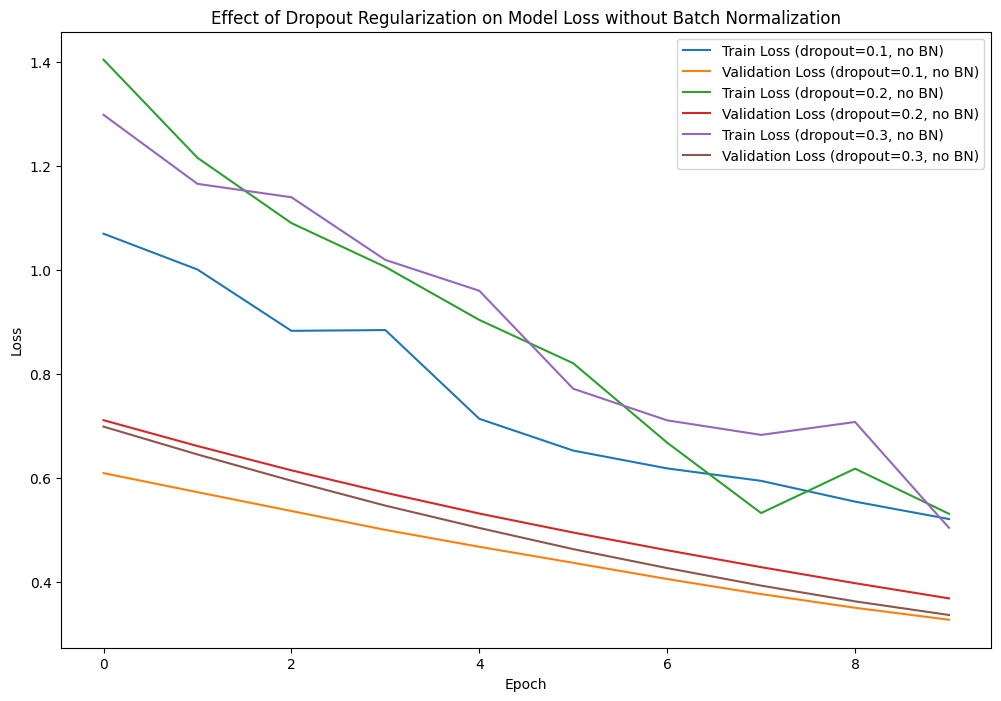

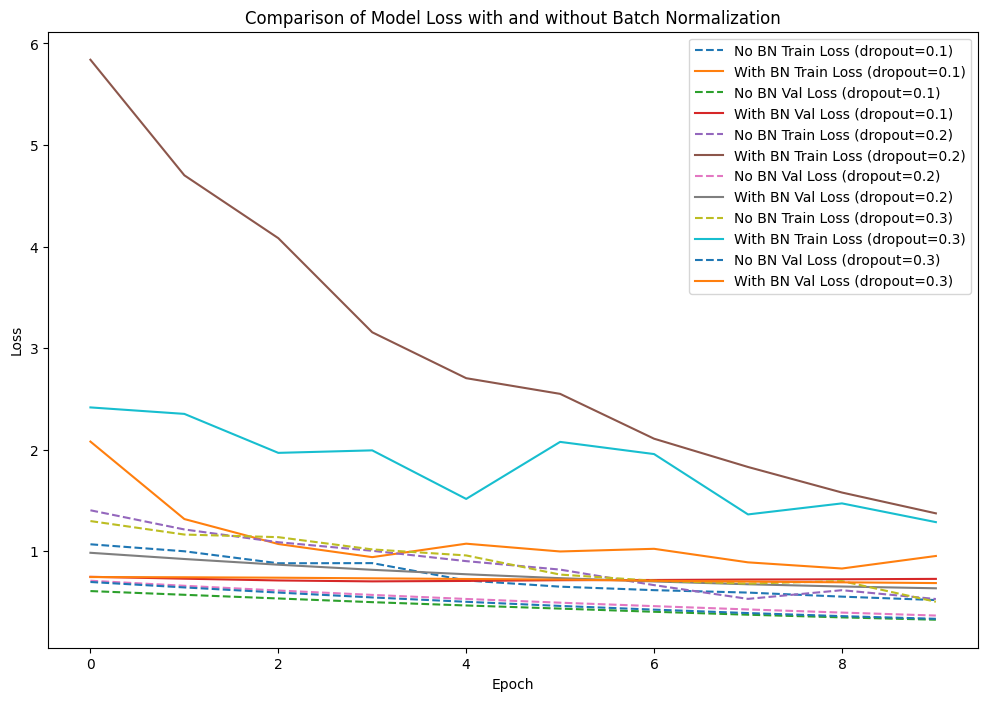

In [ ]:
# @title Implementation 3
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

dataset = pd.read_csv(r'/content/synthetic_regression_dataset (1).csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

def create_model(dropout_rate, use_batch_norm=False):
      model = Sequential()
      model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
      if use_batch_norm:
         model.add(BatchNormalization())
      model.add(Dropout(dropout_rate))

      model.add(Dense(64, activation='relu'))
      if use_batch_norm:
         model.add(BatchNormalization())
      model.add(Dropout(dropout_rate))

      model.add(Dense(1, activation='linear'))

      model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
      return model
dropout_rates = [0.1, 0.2, 0.3]

histories_without_bn = {}
histories_with_bn = {}

for rate in dropout_rates:
      print(f"Training model without batch normalization, dropout rate: {rate}")
      model = create_model(rate, use_batch_norm=False)
      history = model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=32, verbose=0)
      histories_without_bn[rate] = history

      print(f"Training model with batch normalization, dropout rate: {rate}")
      model = create_model(rate, use_batch_norm=True)
      history = model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=32, verbose=0)
      histories_with_bn[rate] = history


plt.figure(figsize=(12, 8))
for rate in dropout_rates:
    plt.plot(histories_without_bn[rate].history['loss'], label=f'Train Loss (dropout={rate}, no BN)')
    plt.plot(histories_without_bn[rate].history['val_loss'], label=f'Validation Loss (dropout={rate}, no BN)')

plt.title('Effect of Dropout Regularization on Model Loss without Batch Normalization')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

# Comparing convergence speed and final loss
plt.figure(figsize=(12, 8))
for rate in dropout_rates:
    plt.plot(histories_without_bn[rate].history['loss'], label=f'No BN Train Loss (dropout={rate})', linestyle='dashed')
    plt.plot(histories_with_bn[rate].history['loss'], label=f'With BN Train Loss (dropout={rate})')
    plt.plot(histories_without_bn[rate].history['val_loss'], label=f'No BN Val Loss (dropout={rate})', linestyle='dashed')
    plt.plot(histories_with_bn[rate].history['val_loss'], label=f'With BN Val Loss (dropout={rate})')

plt.title('Comparison of Model Loss with and without Batch Normalization')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()


Training model with Adam optimizer


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training model with Adagrad optimizer
Training model with Nesterov optimizer


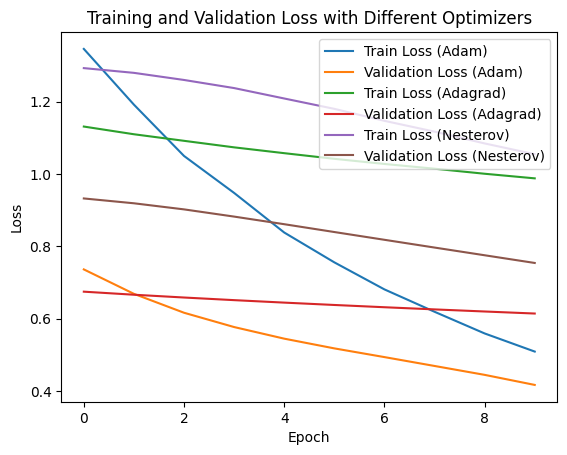

Final loss with Adam optimizer: 0.48546966910362244
Final loss with Adagrad optimizer: 0.9190089106559753
Final loss with Nesterov optimizer: 1.0562375783920288


In [ ]:
# @title Implementation 4
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, Adagrad, SGD
import matplotlib.pyplot as plt

# Load the synthetic dataset
dataset = pd.read_csv(r'/content/synthetic_regression_dataset (1).csv')

# Splitting the dataset into features and target
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Function to create the model
def create_model():
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='linear'))
    return model

 # Dictionary to store final losses
final_losses = {}

# List of optimizers to experiment with
optimizers = {
'Adam': Adam(learning_rate=0.001),
'Adagrad': Adagrad(learning_rate=0.001),
'Nesterov': SGD(learning_rate=0.001, momentum=0.9, nesterov=True)}


# Train the model with different optimizers and compare the final loss
for opt_name, optimizer in optimizers.items():
    print(f"Training model with {opt_name} optimizer")
    model = create_model()
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    history = model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=32, verbose=0)
    final_loss = model.evaluate(X_test, y_test, verbose=0)
    final_losses[opt_name] = final_loss
    plt.plot(history.history['loss'], label=f'Train Loss ({opt_name})')
    plt.plot(history.history['val_loss'], label=f'Validation Loss ({opt_name})')

# Plotting the training and validation loss for different optimizers
plt.title('Training and Validation Loss with Different Optimizers')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

# Print final losses for comparison
for opt_name, final_loss in final_losses.items():
    print(f"Final loss with {opt_name} optimizer: {final_loss}")


Training model with Hidden: relu, Output: linear


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training model with Hidden: sigmoid, Output: linear
Training model with Hidden: tanh, Output: linear
Training model with Hidden: softmax, Output: linear


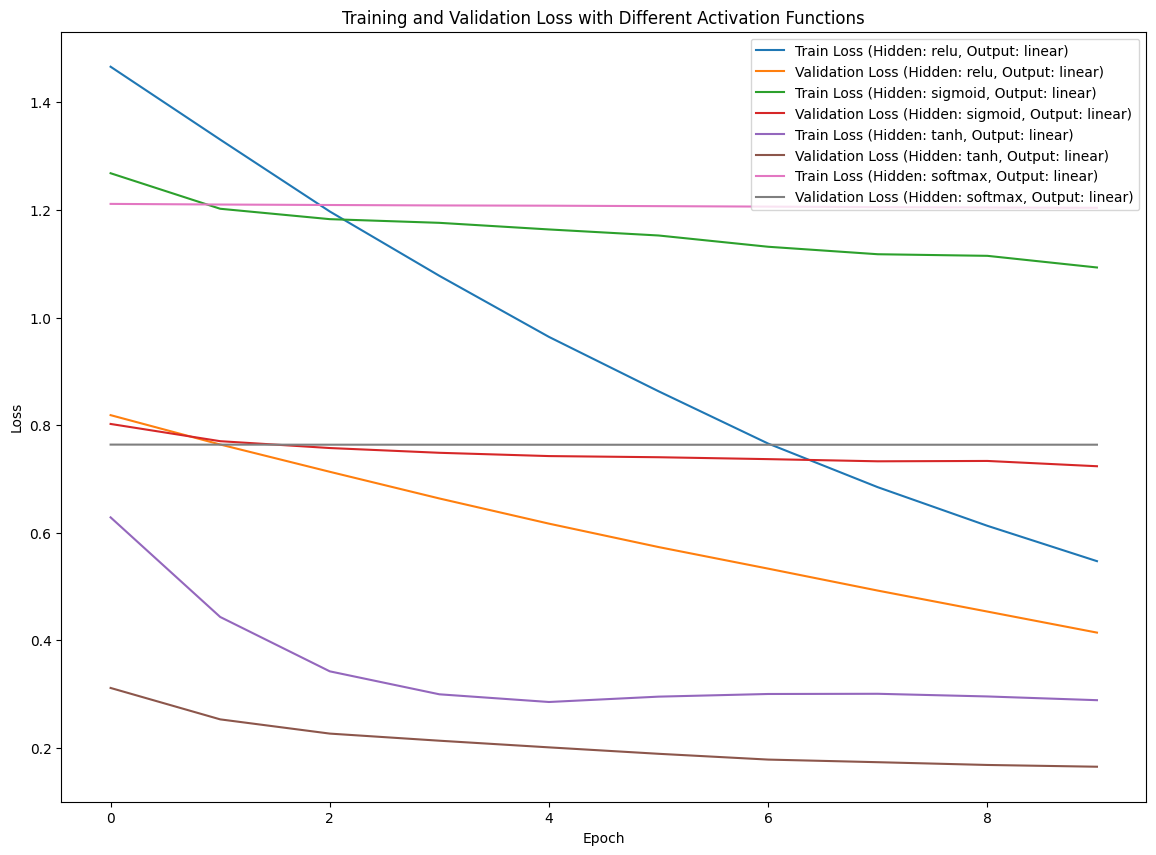

Final loss with Hidden: relu, Output: linear: 0.5375021696090698
Final loss with Hidden: sigmoid, Output: linear: 0.9662214517593384
Final loss with Hidden: tanh, Output: linear: 0.37771376967430115
Final loss with Hidden: softmax, Output: linear: 1.018386721611023


In [ ]:
# @title Implementation 5
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Load the synthetic dataset
dataset = pd.read_csv(r'/content/synthetic_regression_dataset (1).csv')

# Splitting the dataset into features and target
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Function to create the model with specified activation functions
def create_model(hidden_activation='relu', output_activation='linear'):
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation=hidden_activation))
    model.add(Dense(64, activation=hidden_activation))
    model.add(Dense(1, activation=output_activation))
    return model

# List of activation functions to experiment with
activation_functions = ['relu', 'sigmoid', 'tanh', 'softmax']

# Dictionary to store histories and final losses
histories = {}
final_losses = {}

                    # Train the model with different activation functions
for hidden_activation in activation_functions:
    for output_activation in ['linear']:  # For regression, output activation is typically 'linear'
       key = f"Hidden: {hidden_activation}, Output: {output_activation}"
       print(f"Training model with {key}")
       model = create_model(hidden_activation, output_activation)
       model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
       history = model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=32, verbose=0)
       final_loss = model.evaluate(X_test, y_test, verbose=0)
       histories[key] = history
       final_losses[key] = final_loss

# Plotting the training and validation loss for different activation functions
plt.figure(figsize=(14, 10))
for key, history in histories.items():
    plt.plot(history.history['loss'], label=f'Train Loss ({key})')
    plt.plot(history.history['val_loss'], label=f'Validation Loss ({key})')

plt.title('Training and Validation Loss with Different Activation Functions')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

# Print final losses for comparison
for key, final_loss in final_losses.items():
    print(f"Final loss with {key}: {final_loss}")


Training model with Hidden: relu, Output: linear


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Training model with Hidden: sigmoid, Output: linear


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Training model with Hidden: tanh, Output: linear


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Training model with Hidden: softmax, Output: linear


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


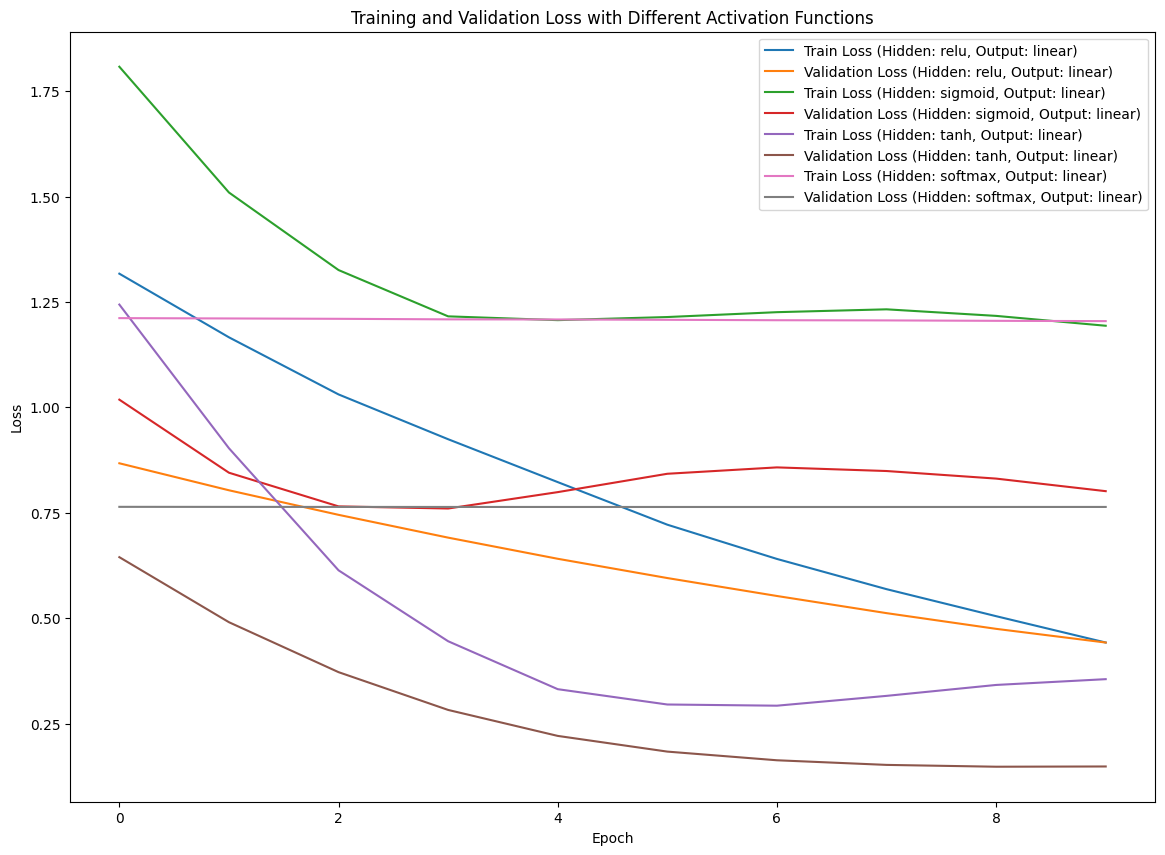

Final loss with Hidden: relu, Output: linear: 0.4607625901699066
Final MSE with Hidden: relu, Output: linear: 0.46076262366865717
Final loss with Hidden: sigmoid, Output: linear: 1.0603880882263184
Final MSE with Hidden: sigmoid, Output: linear: 1.0603881060634412
Final loss with Hidden: tanh, Output: linear: 0.32913994789123535
Final MSE with Hidden: tanh, Output: linear: 0.32913993074248316
Final loss with Hidden: softmax, Output: linear: 1.0185540914535522
Final MSE with Hidden: softmax, Output: linear: 1.0185541436586187


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Load the synthetic dataset
dataset = pd.read_csv(r'/content/synthetic_regression_dataset (1).csv')

# Splitting the dataset into features and target
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Function to create the model with specified activation functions
def create_model(hidden_activation='relu', output_activation='linear'):
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation=hidden_activation))
    model.add(Dense(64, activation=hidden_activation))
    model.add(Dense(1, activation=output_activation))
    return model

# List of activation functions to experiment with
activation_functions = ['relu', 'sigmoid', 'tanh', 'softmax']

# Dictionary to store histories and final losses
histories = {}
final_losses = {}
final_mse = {}

                    # Train the model with different activation functions
for hidden_activation in activation_functions:
    for output_activation in ['linear']:  # For regression, output activation is typically 'linear'
        key = f"Hidden: {hidden_activation}, Output: {output_activation}"
        print(f"Training model with {key}")
        model = create_model(hidden_activation, output_activation)
        model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
        history = model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=32, verbose=0)
        final_loss = model.evaluate(X_test, y_test, verbose=0)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        histories[key] = history
        final_losses[key] = final_loss
        final_mse[key] = mse

                                                                                                                # Plotting the training and validation loss for different activation functions
plt.figure(figsize=(14, 10))
for key, history in histories.items():
    plt.plot(history.history['loss'], label=f'Train Loss ({key})')
    plt.plot(history.history['val_loss'], label=f'Validation Loss ({key})')

plt.title('Training and Validation Loss with Different Activation Functions')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

                                                                                                                        # Print final losses and MSE for comparison
for key in final_losses:
   print(f"Final loss with {key}: {final_losses[key]}")
   print(f"Final MSE with {key}: {final_mse[key]}")
